#### **Exploratory Data Analysis (EDA)** – Red Wine Quality Dataset
----- 

##### **1. Introduction :**

This dataset contains physicochemical properties of red wine samples along with their quality ratings.

##### The objective of this notebook is to:

- Perform data exploration

- Clean the dataset

- Analyze relationships between variables

- Extract meaningful insights

##### **2. Import Libraries :**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



##### **3. Load the Dataset :**

In [12]:
df = pd.read_csv("winequality-red.csv",sep=';')
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### **4. Basic Data Exploration :**

In [14]:
# Dataset Shape
df.shape

(1599, 12)

In [15]:
# Column Names
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [16]:
# Data Types and Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
# Statistical Summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### **5. Data Cleaning :**

In [19]:
# Unique Value
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [20]:
# Check Missing Values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [25]:
# Duplicate records
df[df.duplicated()].sum()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [24]:
# Remove Duplicates
df.drop_duplicates(inplace=True)
df.shape

(1359, 12)

##### **6. Exploratory Data Analysis (EDA) :**

1. **Correlation Matrix:**

 Observation:

- Alcohol shows positive correlation with quality.

- Volatile acidity shows negative correlation with quality.

- Some multicollinearity exists between features.

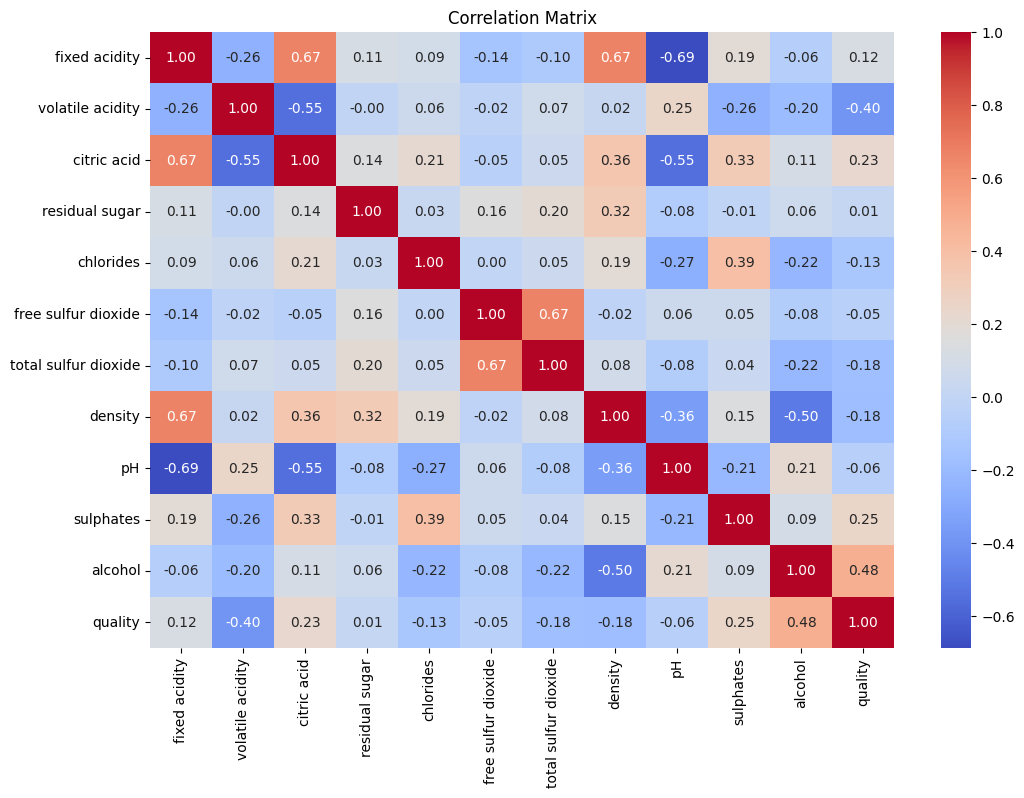

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

2. **Distribution of Target Variable (Quality):**

Observation:

- Dataset is imbalanced.

- Most wines fall in the mid-range quality (5–6).

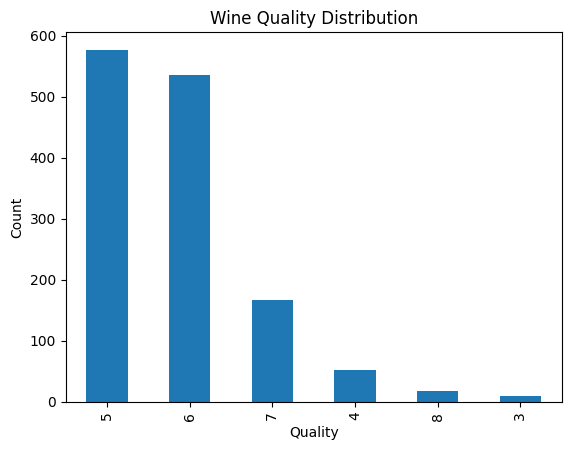

In [27]:
df['quality'].value_counts().plot(kind='bar')
plt.title("Wine Quality Distribution")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()


3. **Univariate Analysis (Histograms) :**

Observation:

- Some features are normally distributed.

- Some features are skewed (e.g., residual sugar, chlorides).

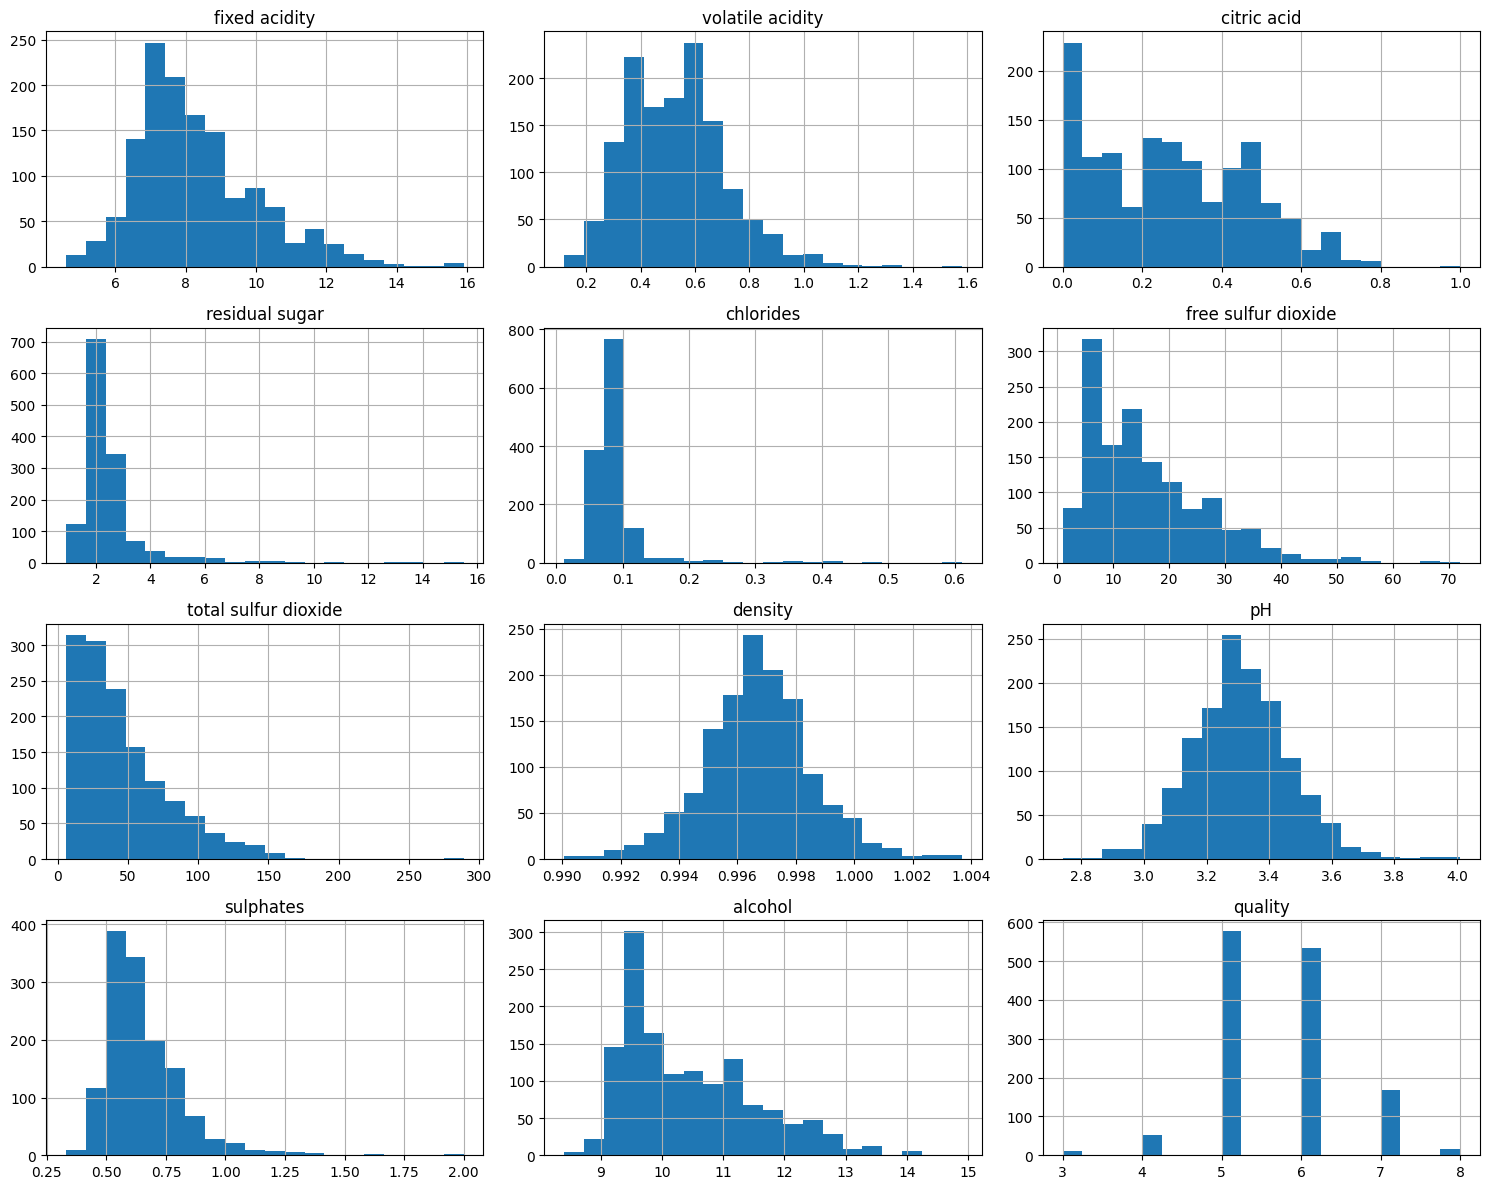

In [28]:
df.hist(figsize=(15,12), bins=20)
plt.tight_layout()
plt.show()


4. **Boxplot: Alcohol vs Quality :**

Observation:

- Higher quality wines tend to have higher alcohol content.
- Also you can see outliers and 5 number summary

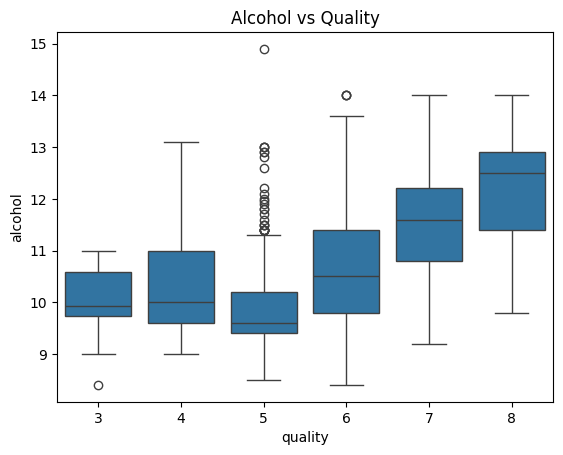

In [29]:
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Alcohol vs Quality")
plt.show()


5. **Scatter Plot :**

Observation:

- Some clustering patterns appear based on quality levels.

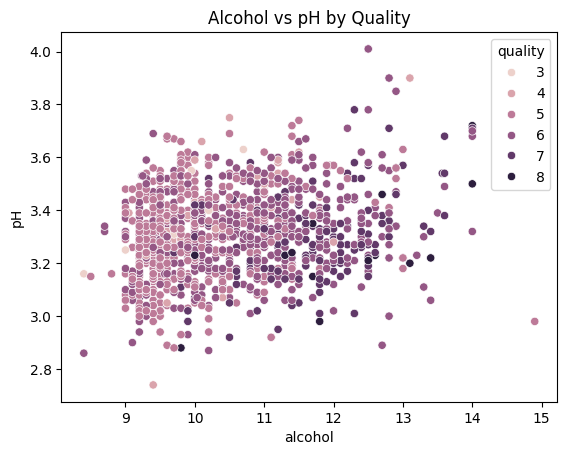

In [30]:
sns.scatterplot(x='alcohol', y='pH', hue='quality', data=df)
plt.title("Alcohol vs pH by Quality")
plt.show()


----